In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Árboles de decisión

### Diabetes dataset

In [2]:
from sklearn.datasets import load_diabetes
X_whole, y_whole = load_diabetes(return_X_y=True, as_frame=True)

## Análisis dataset

In [3]:
X_whole.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


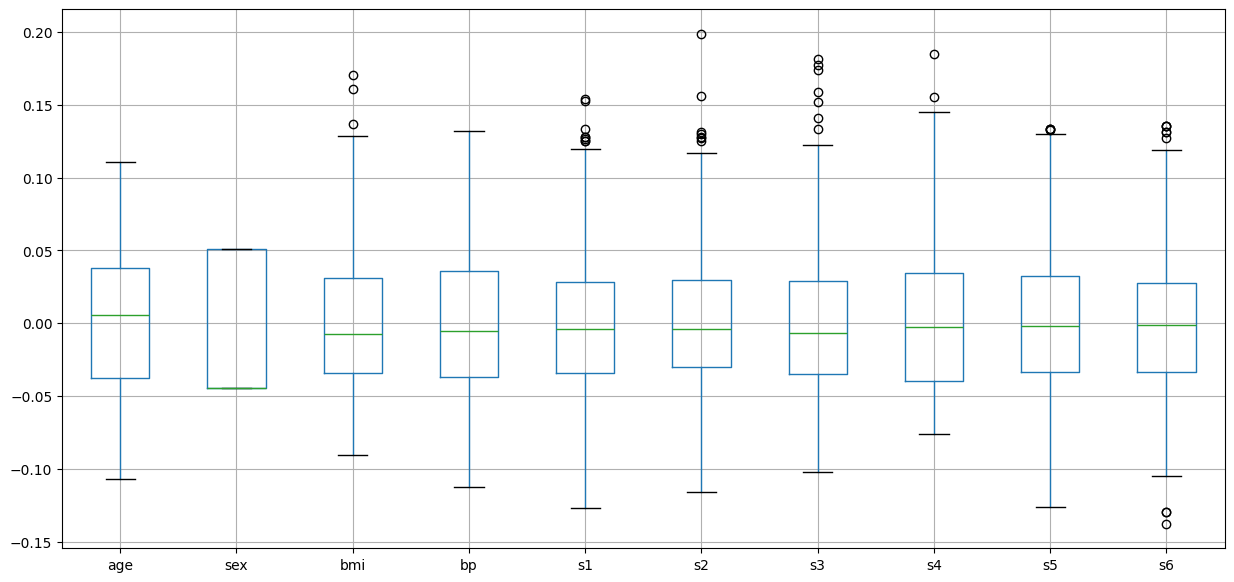

In [4]:
boxplot = X_whole.boxplot(figsize=(15,7))

plt.show()

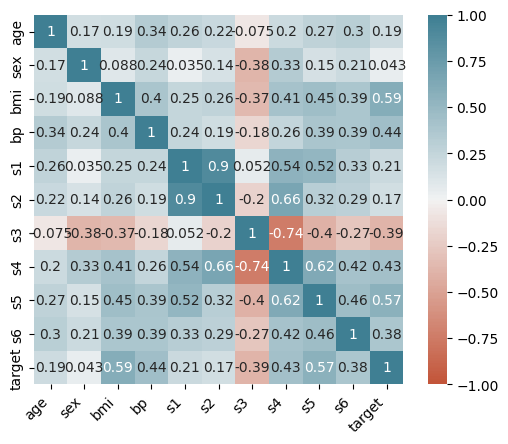

In [5]:
import seaborn as sb

df_diabetes = pd.concat([X_whole, y_whole], axis=1)

corr= df_diabetes.corr()
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [6]:
y_whole.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


<Axes: >

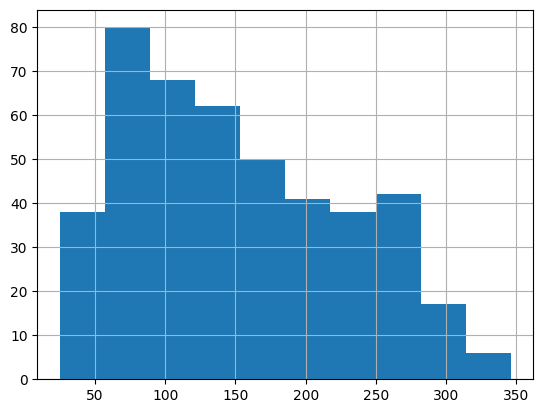

In [7]:
y_whole.hist()

### División dataset

In [8]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X_whole.values, y_whole, test_size=0.2, random_state=6)

In [9]:
y_train.shape

(353,)

# Random forest regression

### Entrenamiento

In [10]:
from sklearn.ensemble import RandomForestRegressor

diabetes_RFR = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0, oob_score=True)
diabetes_RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, oob_score=True, random_state=0)

### Predicciones

In [11]:
# Get predictions
RFR_ypred = diabetes_RFR.predict(x_test)

### Métricas modelo

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute metrics
RFR_mse = mean_squared_error(y_test, RFR_ypred)
print("MSE:", RFR_mse)
print("MAE:", mean_absolute_error(y_test, RFR_ypred))
print("RMSE:", np.sqrt(RFR_mse))
RFR_r2 = r2_score(y_test, RFR_ypred)
print("R^2", RFR_r2)

MSE: 3452.8819937337
MAE: 45.85885187709197
RMSE: 58.761228660858514
R^2 0.36775589068985903


# Decision Tree Regression

### Entrenamiento

In [13]:
from sklearn.tree import DecisionTreeRegressor

diabetes_DTR = DecisionTreeRegressor(max_depth=5, random_state=0)
diabetes_DTR.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

### Predicciones

In [14]:
# Get predictions
DTR_ypred = diabetes_DTR.predict(x_test)

### Métricas modelo

In [15]:
# Compute metrics
DTR_mse = mean_squared_error(y_test, DTR_ypred)
print("MSE:", DTR_mse)
print("MAE:",mean_absolute_error(y_test, DTR_ypred))
print("RMSE:", np.sqrt(DTR_mse))
DTR_r2 = r2_score(y_test, DTR_ypred)
print("R^2", DTR_r2)

MSE: 4759.667891462465
MAE: 54.1331899394252
RMSE: 68.99034636427379
R^2 0.12847528756818272
